<a target="_blank" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/065_loc_scale.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(loc-scale-notebook)=
# Indici di posizione e di scala

La visualizzazione grafica dei dati rappresenta il pilastro fondamentale di ogni analisi quantitativa. Grazie alle rappresentazioni grafiche adeguate, è possibile individuare importanti caratteristiche di una distribuzione, quali la simmetria o l'asimmetria, nonché la presenza di una o più mode. Successivamente, al fine di descrivere sinteticamente le principali caratteristiche dei dati, si rende necessario l'utilizzo di specifici indici numerici. In questo capitolo, verranno presentati i principali indicatori della statistica descrittiva.

## Indici di tendenza centrale

La media aritmetica è la misura più comune utilizzata per rappresentare il valore centrale di un insieme di dati. Questo calcolo ci fornisce informazioni cruciali riguardo ai valori attorno ai quali i dati del campione si concentrano. In altre parole, ci permette di ottenere un punto di riferimento che rappresenta tipicamente il valore medio dei dati, rendendolo un indicatore essenziale della tendenza centrale della distribuzione.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az

In [3]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

### Media

La media aritmetica di un insieme di valori è il valore centrale ottenuto dalla somma di tutti i valori divisi per il numero totale di valori, come espresso dalla formula:

$$
\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i,
$$ (eq-mean)

dove $x_i$ rappresenta i valori dell'insieme, $n$ è il numero totale di valori e $\sum$ indica la sommatoria.

Questa formula è ampiamente utilizzata in statistica per calcolare il valore centrale di un insieme di dati. Ad esempio, considerando i valori 3, 5, 7, 10, possiamo calcolare la media come segue:

$$
\bar{x}=\frac{1}{4} (3+5+7+10) = \frac{25}{4}.
$$

Una proprietà fondamentale della media è che la somma degli scarti tra ciascun valore e la media aritmetica è uguale a zero:

$$
\sum_{i=1}^n (x_i - \bar{x}) = 0.\notag
$$ (eq-diffmeansumzero)

Infatti,

$$
\begin{aligned}
\sum_{i=1}^n (x_i - \bar{x}) &= \sum_i x_i - \sum_i \bar{x}\notag\\
&= \sum_i x_i - n \bar{x}\notag\\
&= \sum_i x_i - \sum_i x_i = 0.\notag
\end{aligned}
$$

Questa proprietà implica che la media aritmetica rappresenta un valore attorno al quale i dati sono equamente distribuiti in positivo e negativo rispetto alla media stessa.

Un altro aspetto importante è il "principio dei minimi quadrati", secondo cui la somma dei quadrati degli scarti tra ciascun valore e una costante arbitraria $a$, cioè $\varphi(a) = \sum_{i=1}^n (x_i - a)^2$, è minima quando $a$ è uguale alla media aritmetica. Questo principio è fondamentale nell'analisi statistica dei modelli di regressione.

La media può essere interpretata come il baricentro della distribuzione. Il baricentro, o centro di massa, è un concetto della fisica che rappresenta il punto in cui la massa di un sistema è concentrata. In un sistema fisico, il baricentro può essere interpretato come il punto in cui un oggetto sarebbe in equilibrio, se fosse appeso a un perno. Nel contesto delle distribuzioni di dati, possiamo considerare il baricentro come il "punto centrale" della distribuzione.

Per spiegare la proprietà che la media è il baricentro della distribuzione, possiamo immaginare ogni valore dell'insieme di dati rappresentato come un punto materiale con una massa proporzionale al suo valore. Valori più grandi avranno una massa maggiore, mentre valori più piccoli avranno una massa minore. Posizionando questi punti materiali su una linea, con valori più grandi a destra e valori più piccoli a sinistra, il baricentro della distribuzione corrisponderà esattamente alla media di questi punti materiali.

Questa idea può essere dimostrata matematicamente considerando la definizione di media. Immaginiamo che la distanza dei punti materiali dalla media sia rappresentata come $|x_i - \mu|$, dove $x_i$ è il valore di un punto e $\mu$ è la media. La somma di tutte queste distanze sarà:

$$
\sum(|x_i - \mu|) = (|x_1 - \mu| + |x_2 - \mu| + \dots + |x_n - \mu|).
$$

Il baricentro corrisponderà al punto in cui questa somma delle distanze è minima. E poiché la formula della media è stata definita in modo tale da minimizzare la somma dei quadrati delle distanze (metodo dei minimi quadrati), si dimostra che la media è il baricentro della distribuzione.

La media aritmetica, tuttavia, ha alcune limitazioni: non sempre è l'indice più adeguato per descrivere accuratamente la tendenza centrale della distribuzione, specialmente quando si verificano asimmetrie o valori anomali (outlier). In queste situazioni, è più indicato utilizzare la mediana o la media spuntata (come spiegheremo successivamente).

Per calcolare la media di un piccolo numero di valori in Python, possiamo utilizzare la somma di questi valori e dividerla per il numero totale di elementi. Consideriamo ad esempio i valori 12, 44, 21, 62, 24:

In [1]:
(12 + 44 + 21 + 62 + 24) / 5

32.6

ovvero

In [6]:
x = np.array([12, 44, 21, 62, 24])
np.mean(x)

array([12, 44, 21, 62, 24])

Molto spesso però i nostri dati sono contenuti in file e inserire i dati manualmente non è fattibile. Per fare un esempio, considereremo i dati del Progetto STAR, contenuti nel file `STAR.csv`, che rappresentano un'importante indagine sulle prestazioni degli studenti in relazione alla dimensione delle classi. Negli anni '80, i legislatori del Tennessee considerarono la possibilità di ridurre le dimensioni delle classi per migliorare il rendimento degli studenti. Al fine di prendere decisioni informate, commissionarono lo studio multimilionario "Progetto Student-Teacher Achievement Ratio" (Project STAR). Lo studio coinvolgeva bambini della scuola materna assegnati casualmente a classi piccole, con 13-17 studenti, o classi di dimensioni regolari, con 22-25 studenti, fino alla fine della terza elementare. I ricercatori hanno seguito il progresso degli studenti nel tempo, concentrandosi su variabili di risultato, come i punteggi dei test standardizzati di lettura (reading) e matematica (math) alla terza elementare, oltre ai tassi di diploma di scuola superiore (graduated, con valore 1 per sì e 0 per no).

Poniamoci il problema di calcolare la media dei punteggi `math` calcolata separatamente per i due gruppi di studenti: coloro che hanno completato la scuola superiore e coloro che non l'hanno completata.

Procediamo all'importazione dei dati per iniziare l'analisi.

In [4]:
df = pd.read_csv("data/STAR.csv")
df.head()

,classtype,reading,math,graduated
0,small,578,610,1
1,regular,612,612,1
2,regular,583,606,1
3,small,661,648,1
4,small,614,636,1


Esaminiamo la numerosità di ciascun gruppo.

In [4]:
df.groupby("graduated").size()

graduated
0     166
1    1108
dtype: int64

Creiamo uno `stripplot` per esaminare i dati grezzi di `math` per i due gruppi.

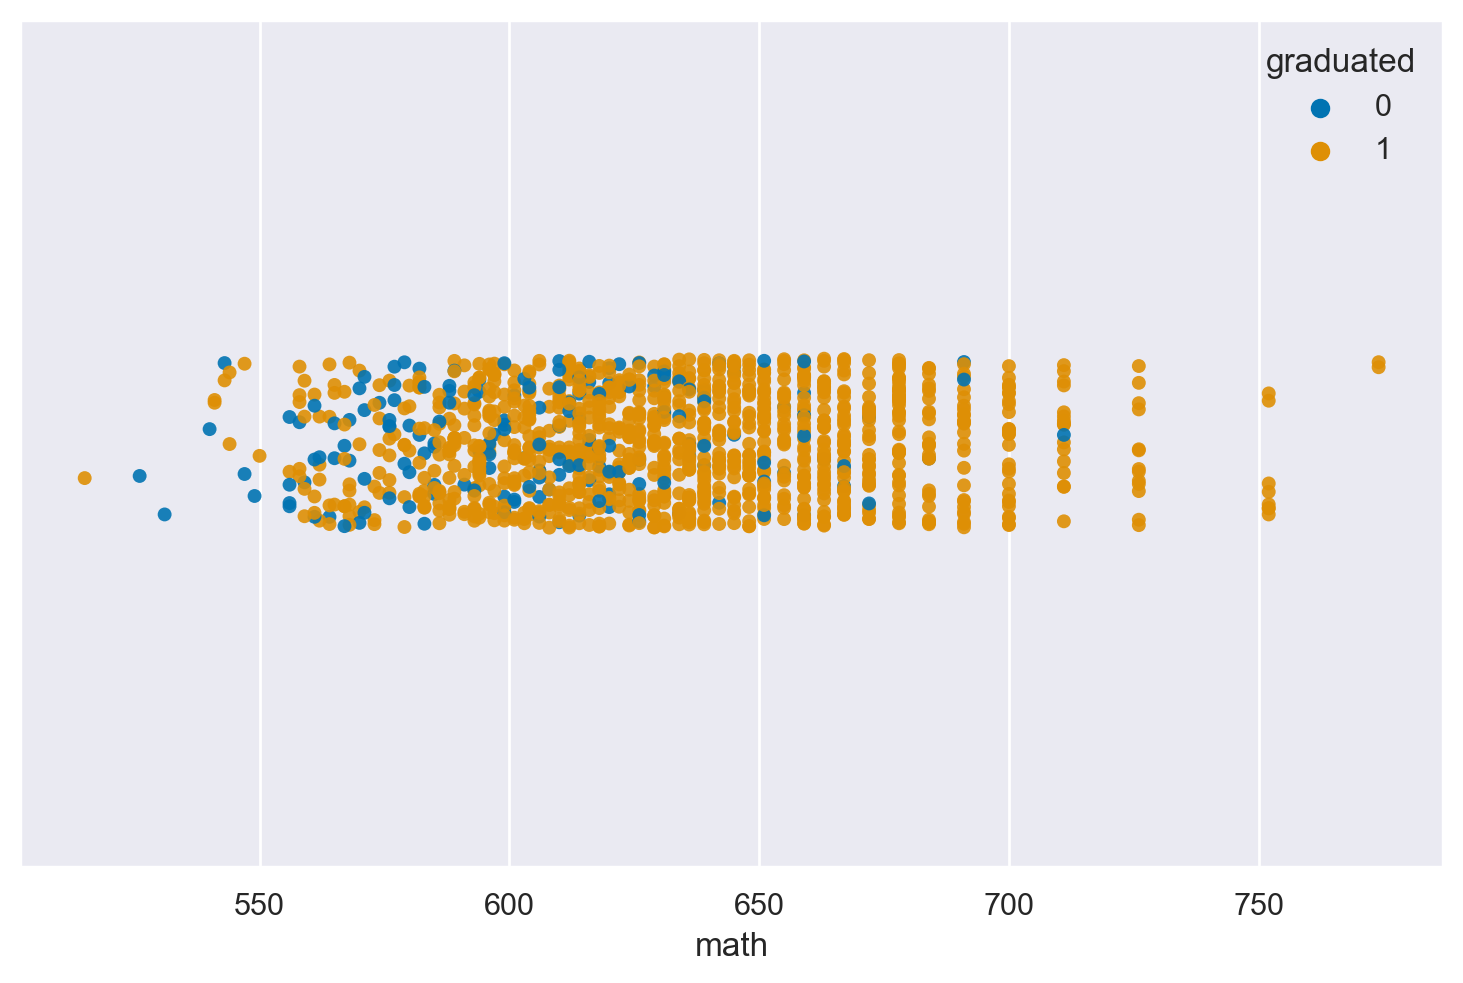

In [8]:
_ = sns.stripplot(x="math", data=df, jitter=0.1, hue="graduated", alpha=0.9)

Ora procediamo al calcolo delle medie dei punteggi `math` all'interno dei due gruppi. Per rendere la risposta più concisa, useremo la funzione `round()` per stampare solo 2 valori decimali.

In [9]:
df.groupby("graduated")["math"].mean().round(2)

graduated
0    606.64
1    635.33
Name: math, dtype: float64

In alternativa, possiamo usare il metodo `.describe()`:

In [10]:
df.groupby("graduated")["math"].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
graduated,,,,,,,,
0,166.0,606.6,34.1,526.0,580.5,606.0,629.0,711.0
1,1108.0,635.3,38.1,515.0,609.5,634.0,659.0,774.0


### Media spuntata

La *media spuntata*, indicata come $\bar{x}_t$ o *trimmed mean*, è un metodo di calcolo della media che prevede l'eliminazione di una determinata percentuale di dati estremi prima di effettuare la media aritmetica. Solitamente, viene eliminato il 10% dei dati, ovvero il 5% all'inizio e alla fine della distribuzione. Per ottenere la media spuntata, i dati vengono ordinati in modo crescente, $x_1 \leq x_2 \leq x_3 \leq \dots \leq x_n$, e quindi viene eliminato il primo 5% e l'ultimo 5% dei dati nella sequenza ordinata. Infine, la media spuntata è calcolata come la media aritmetica dei dati rimanenti. Questo approccio è utile quando ci sono valori anomali o quando la distribuzione è asimmetrica e la media aritmetica non rappresenta adeguatamente la tendenza centrale dei dati.

A titolo di esempio, procediamo al calcolo della media spuntata dei valori `math` per i due gruppi definiti dalla variabile `graduated`, escludendo il 10% dei valori più estremi.

In [5]:
not_graduated = df[df["graduated"] == 0].math
stats.trim_mean(not_graduated, 0.10)

605.6492537313433

In [13]:
graduated = df[df["graduated"] == 1].math
stats.trim_mean(graduated, 0.10)

634.4403153153153

### Quantili

Il quantile non interpolato di ordine $p$ $(0 < p < 1)$ rappresenta il valore che divide la distribuzione dei dati in modo tale che una frazione $p$ dei dati si trovi al di sotto di esso.

La formula per calcolare il quantile non interpolato è la seguente:

$$
    q_p = x_{(k)},
$$

dove $x_{(k)}$ è l'elemento $k$-esimo nell'insieme di dati ordinato in modo crescente, e $k$ è calcolato come:

$$
k = \lceil p \cdot n \rceil,
$$

dove $n$ è il numero totale di dati nel campione, e $\lceil \cdot \rceil$ rappresenta la funzione di arrotondamento all'intero successivo. In questa definizione, il quantile non interpolato corrisponde al valore effettivo nell'insieme di dati, senza effettuare alcuna interpolazione tra i valori circostanti.

Ad esempio, consideriamo il seguente insieme di dati: $\{ 15, 20, 23, 25, 28, 30, 35, 40, 45, 50 \}$. Supponiamo di voler calcolare il quantile non interpolato di ordine $p = 0.3$ (cioè il 30° percentile).

Ordiniamo i dati in modo crescente: $\{ 15, 20, 23, 25, 28, 30, 35, 40, 45, 50 \}.$
Calcoliamo $k$ utilizzando la formula $k = \lceil p \cdot n \rceil$, dove $n$ è il numero totale di dati nel campione. Nel nostro caso, $n = 10$ e $p = 0.3$:

$$
 k = \lceil 0.3 \cdot 10 \rceil = \lceil 3 \rceil = 3. 
 $$

Il quantile non interpolato corrisponde al valore $x_{(k)}$, ovvero l'elemento $k$-esimo nell'insieme ordinato: $q_{0.3} = x_{(3)} = 23.$

Oltre al quantile non interpolato, esiste anche il concetto di quantile interpolato. A differenza del quantile non interpolato, il quantile interpolato può essere calcolato anche per percentili che non corrispondono esattamente a valori presenti nell'insieme di dati. Per ottenere il valore del quantile interpolato, viene utilizzato un procedimento di interpolazione lineare tra i valori adiacenti. In genere, il calcolo del quantile interpolato viene eseguito mediante l'uso di software dedicati.

Ora, procediamo al calcolo dei *quantili* di ordine 0.10 e 0.90 per i valori `math` all'interno dei due gruppi. I quantili sono dei valori che dividono la distribuzione dei dati in parti specifiche. Ad esempio, il quantile di ordine 0.10 corrisponde al valore al di sotto del quale si trova il 10% dei dati, mentre il quantile di ordine 0.90 rappresenta il valore al di sotto del quale si trova il 90% dei dati. 

Calcoliamo i quantili di ordine 0.1 e 0.9 della distribuzione dei punteggi `math` nei due gruppi definiti dalla variabile `graduated`.

In [6]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che hanno completato la scuola superiore
[
    df[df["graduated"] == 1]["math"].quantile(0.1), 
    df[df["graduated"] == 1]["math"].quantile(0.9)
]

[588.0, 684.0]

In [7]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che non hanno completato la scuola superiore
[
    df[df["graduated"] == 0]["math"].quantile(0.1),
    df[df["graduated"] == 0]["math"].quantile(0.9),
]

[564.5, 651.0]

### Moda e mediana

In precedenza abbiamo già incontrato altri due popolari indici di tendenza centrale: la *moda* (*Mo*), che rappresenta il valore centrale della classe con la frequenza massima (in alcune distribuzioni può esserci più di una moda, rendendola *multimodale* e facendo perdere a questo indice il suo significato di indicatore di tendenza centrale); e la *mediana* ($\tilde{x}$), che rappresenta il valore corrispondente al quantile di ordine 0.5 della distribuzione.

### Quando usare media, moda, mediana

La moda può essere utilizzata per dati a livello nominale o ordinale ed è l'unica tra le tre statistiche che può essere calcolata in questi casi.

La media, d'altra parte, è una buona misura di tendenza centrale solo se la distribuzione dei dati è simmetrica, ossia se i valori sono distribuiti uniformemente a sinistra e a destra della media. Tuttavia, se ci sono valori anomali o se la distribuzione è asimmetrica, la media può essere influenzata in modo significativo e, pertanto, potrebbe non essere la scelta migliore come misura di tendenza centrale.

In queste situazioni, la mediana può fornire una misura migliore di tendenza centrale rispetto alla media poiché è meno influenzata dai valori anomali e si basa esclusivamente sul valore centrale dell'insieme di dati. Di conseguenza, la scelta tra media e mediana dipende dal tipo di distribuzione dei dati e dagli obiettivi dell'analisi.

## Indici di dispersione

Le misure di posizione descritte in precedenza, come le medie e gli indici di posizione, offrono una sintesi dei dati mettendo in evidenza la tendenza centrale delle osservazioni. Tuttavia, trascurano un aspetto importante della distribuzione dei dati: la variabilità dei valori numerici della variabile statistica. Pertanto, è essenziale completare la descrizione della distribuzione di una variabile statistica utilizzando anche indicatori che valutino la dispersione delle unità statistiche. In questo modo, otterremo una visione più completa e approfondita delle caratteristiche del campione analizzato.

### Indici basati sull’ordinamento dei dati

Per valutare la variabilità dei dati, è possibile utilizzare indici basati sull'ordinamento dei dati. L'indice più semplice è l'intervallo di variazione, che corrisponde alla differenza tra il valore massimo e il valore minimo di una distribuzione di dati. Tuttavia, questo indice ha il limite di essere calcolato basandosi solo su due valori della distribuzione, e non tiene conto di tutte le informazioni disponibili. Inoltre, l'intervallo di variazione può essere fortemente influenzato dalla presenza di valori anomali.

Un altro indice basato sull'ordinamento dei dati è la differenza interquartile, già incontrata in precedenza. Anche se questo indice utilizza più informazioni rispetto all'intervallo di variazione, presenta comunque il limite di essere calcolato basandosi solo su due valori della distribuzione, ossia il primo quartile $Q_1$ e il terzo quartile $Q_3$.

Per valutare la variabilità in modo più completo, è necessario utilizzare altri indici di variabilità che tengano conto di tutti i dati disponibili. In questo modo, si otterrà una valutazione più accurata della dispersione dei valori nella distribuzione e si potranno individuare eventuali pattern o tendenze nascoste.

### Varianza

Date le limitazioni delle statistiche descritte in precedenza, è più comune utilizzare una misura di variabilità che tenga conto della dispersione dei dati rispetto a un indice di tendenza centrale. La varianza è la misura di variabilità più utilizzata per valutare la variabilità di una variabile statistica. Essa è definita come la media dei quadrati degli scarti $x_i - \bar{x}$ tra ogni valore e la media della distribuzione, come segue:

$$
\begin{equation}
S^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2.
\end{equation}
$$ (eq-var-descr)

La varianza è una misura di dispersione più completa rispetto a quelle descritte in precedenza. Tuttavia, è appropriata solo nel caso di distribuzioni simmetriche ed è fortemente influenzata dai valori anomali, come altre misure di dispersione. Inoltre, la varianza è espressa in un'unità di misura che è il quadrato dell'unità di misura dei dati originali, pertanto, potrebbe non essere facilmente interpretata in modo intuitivo.

Calcoliamo la varianza dei valori `math` per i dati del progetto STAR. Applicando l'equazione della varianza, otteniamo:

In [15]:
sum((df["math"] - np.mean(df["math"])) ** 2) / len(df["math"])

1507.2328523125227

Più semplicemente, possiamo usare la funzione `np.var()`:

In [16]:
np.var(df["math"])

1507.2328523125227

#### Stima della varianza della popolazione

Si noti il denominatore della formula della varianza. Nell'equazione {eq}`eq-var-descr`, ho utilizzato $n$ come denominatore (l'ampiezza campionaria, ovvero il numero di osservazioni nel campione). In questo modo, otteniamo la varianza come *statistica descrittiva* del campione. Tuttavia, è possibile utilizzare $n-1$ come denominatore alternativo:

$$
\begin{equation}
s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2
\end{equation}
$$ (eq-var-stimatore)

In questo secondo caso, otteniamo la varianza come *stimatore* della varianza della popolazione. Si può dimostrare che l'equazione {eq}`eq-var-stimatore` fornisce una stima corretta (ovvero, non distorta) della varianza della popolazione da cui abbiamo ottenuto il campione, mentre l'equazione {eq}`eq-var-descr` fornisce (in media) una stima troppo piccola della varianza della popolazione. Si presti attenzione alla notazione: $S^2$ rappresenta la varianza come statistica descrittiva, mentre $s^2$ rappresenta la varianza come stimatore.

Per illustrare questo punto, svolgiamo una simulazione. Consideriamo la distribuzione dei punteggi del quoziente di intelligenza (QI). I valori del QI seguono una particolare distribuzione chiamata *distribuzione normale*, con media 100 e deviazione standard 15. La forma di questa distribuzione è illustrata nella figura seguente.

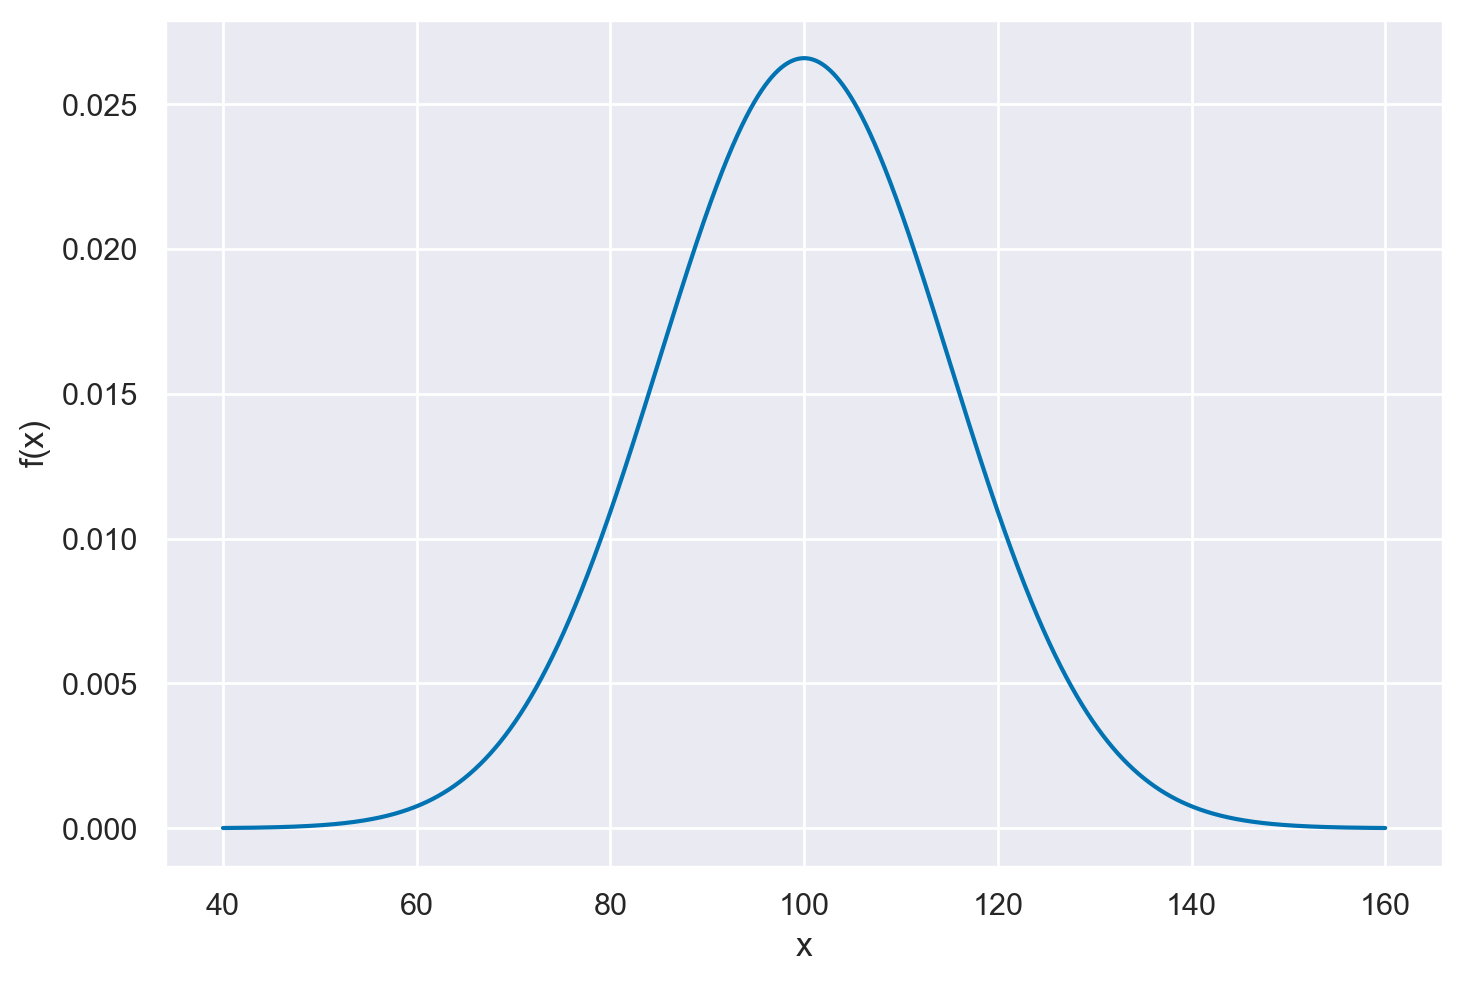

In [17]:
x = np.arange(100 - 4 * 15, 100 + 4 * 15, 0.001)

mu = 100
sigma = 15

pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


Supponiamo di estrarre un campione casuale di 4 osservazioni dalla popolazione del quoziente di intelligenza -- in altre parole, supponiamo di misurare il quoziente di intelligenza di 4 persone prese a caso dalla popolazione.

In [18]:
x = rng.normal(loc=100, scale=15, size=4)
print(x)

[104.5707562   84.40023841 111.25676794 114.10847075]


Calcoliamo la varianza usando $n$ al denominatore. Si noti che la vera varianza del quoziente di intelligenza è $15^2$ = 225.

In [19]:
np.var(x)

134.65656223872708

Consideriamo ora 10 campioni casuali del QI, ciascuno di ampiezza 4.

In [20]:
mu = 100
sigma = 15
size = 4
niter = 10
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

Il primo campione è

In [21]:
random_samples[0]

array([ 70.73447217,  80.4673074 , 101.91760605,  95.25636111])

Il decimo campione è

In [22]:
random_samples[9]

array([111.14881257, 108.14731402,  90.01735439, 103.48241985])

Stampiamo i valori di tutti i 10 campioni.

In [23]:
rs = np.array(random_samples)
rs

array([[ 70.73447217,  80.4673074 , 101.91760605,  95.25636111],
       [ 99.74798264,  87.20434109, 113.19096962, 111.66687903],
       [100.99046046, 116.9086181 , 107.01264013,  87.11061306],
       [105.53126176,  85.61676099, 113.17675452,  99.25111134],
       [ 97.22706455,  89.78605683, 118.33812008,  97.68205777],
       [ 93.57508267,  94.71799674, 107.98463778, 105.48166097],
       [106.19098917, 106.46231505, 132.12471401,  93.90377475],
       [ 92.31635906,  87.79340908, 109.23969134, 116.93458439],
       [ 98.29078814,  87.39765285,  87.63278176, 109.75889182],
       [111.14881257, 108.14731402,  90.01735439, 103.48241985]])

Per ciascun campione (ovvero, per ciascuna riga della matrice
precedente), calcoliamo la varianza usando la formula con $n$ al denominatore.
Otteniamo così 10 stime della varianza della popolazione del QI.

In [24]:
x_var = np.var(rs, axis=1)  # applichiamo la funzione su ciascuna riga
print(x_var)

[149.47766022 109.7600257  116.51542008 102.11584256 112.84327106
  40.55207893 193.79519955 142.57973567  84.58849615  65.38035983]


Notiamo due cose: 

- le stime sono molto diverse tra loro; questo fenomeno è noto con il nome di *variabilità campionaria*;
- in media le stime sembrano troppo piccole.

Per aumentare la sicurezza riguardo al secondo punto menzionato in precedenza, ripeteremo la simulazione utilizzando un numero di iterazioni maggiore.

In [25]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, axis=1)

Esaminiamo la distribuzione dei valori ottenuti.

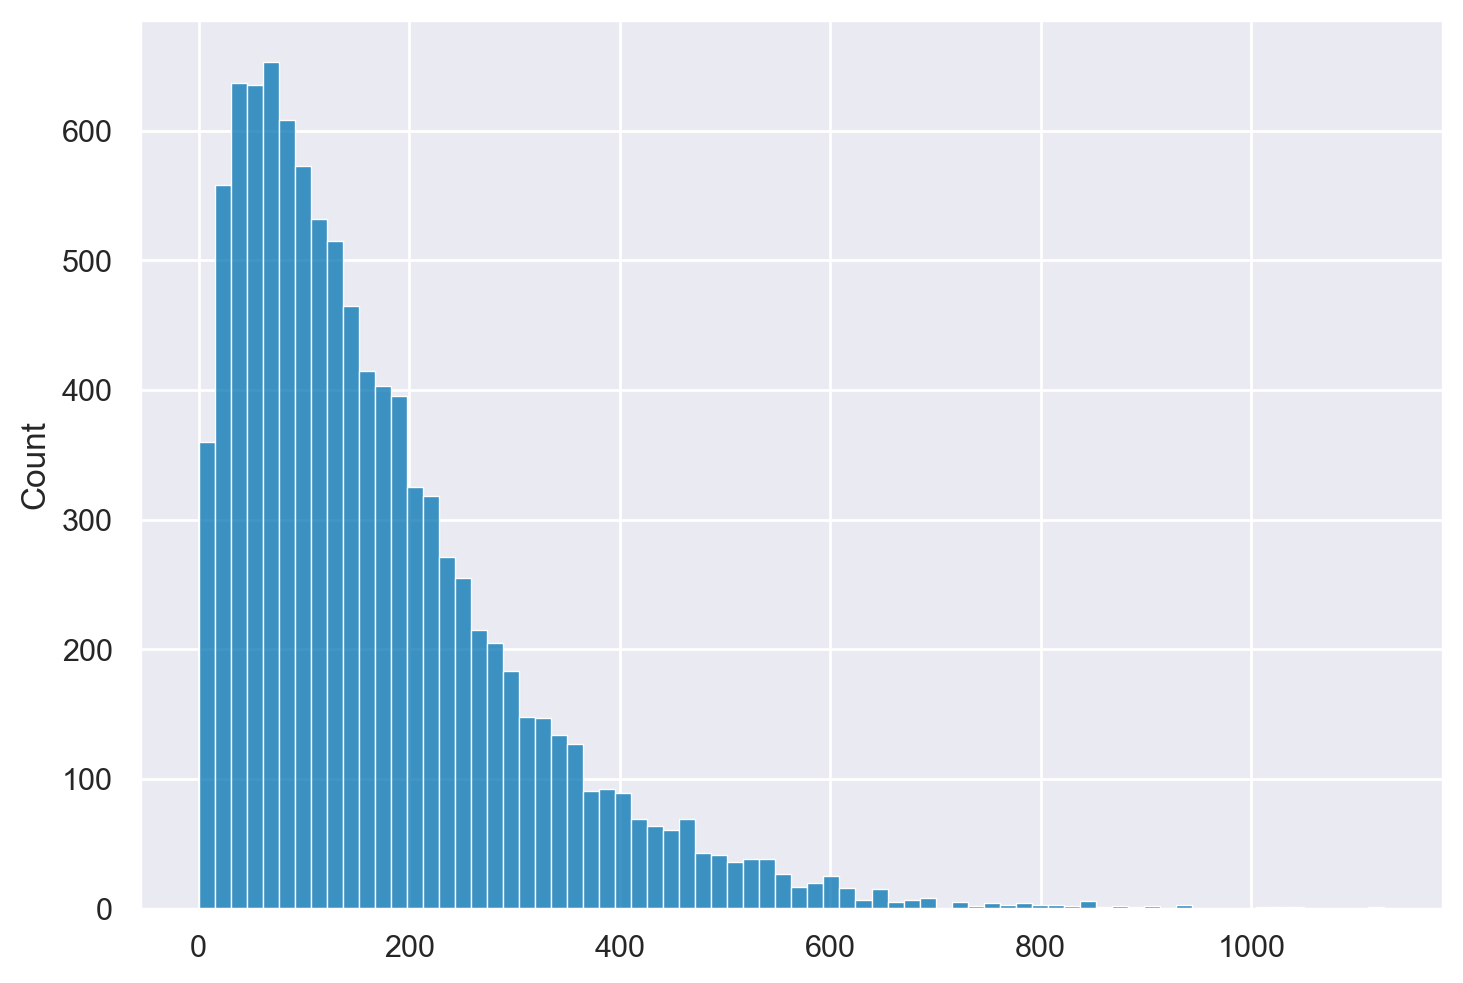

In [26]:
_ = sns.histplot(x_var)

La stima più verosimile della varianza del QI è dato dalla media di
questa distribuzione.

In [27]:
np.mean(x_var)

170.0061889450475

Si noti che il nostro spospetto è stato confermato: il valore medio della stima della varianza ottenuta con l'eq.{eq}`eq-var-descr` è troppo piccolo rispetto al valore corretto di $15^2 = 225$. 

Ripetiamo ora la simulazione usando la formula della varianza con $n-1$ al denominatore.

In [28]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, ddof=1, axis=1)

np.mean(x_var)

225.39234792173943

Nel secondo caso, se utilizziamo $n-1$ come denominatore per calcolare la stima della varianza, il valore atteso di questa stima è molto vicino al valore corretto di 225. Se il numero di campioni fosse infinito, i due valori sarebbero identici.

In conclusione, le due formule della varianza hanno scopi diversi. La formula della varianza con $n$ al denominatore viene utilizzata come statistica descrittiva per descrivere la variabilità di un particolare campione di osservazioni. D'altro canto, la formula della varianza con $n-1$ al denominatore viene utilizzata come stimatore per ottenere la migliore stima della varianza della popolazione da cui quel campione è stato estratto.

### Deviazione standard

Per interpretare la varianza in modo più intuitivo, si può calcolare la deviazione standard (o scarto quadratico medio o scarto tipo) prendendo la radice quadrata della varianza. La deviazione standard è espressa nell'unità di misura originaria dei dati, a differenza della varianza che è espressa nel quadrato dell'unità di misura dei dati. La deviazione standard fornisce una misura della dispersione dei dati attorno alla media, rendendo più facile la comprensione della variabilità dei dati.

La deviazione standard (o scarto quadratico medio, o scarto tipo) è definita come:

$$
s^2 = \sqrt{(n-1)^{-1} \sum_{i=1}^n (x_i - \bar{x})^2}.
$$ (eq-sd-stimatore)

Quando tutte le osservazioni sono uguali, $s = 0$, altrimenti $s > 0$.

```{admonition} Nota
Il termine *standard deviation* è stato introdotto in statistica da Pearson nel 1894 assieme alla lettera greca $\sigma$ che lo rappresenta. Il termine italiano "deviazione standard" ne è la traduzione più utilizzata nel linguaggio comune; il termine dell’[Ente Nazionale Italiano di Unificazione](https://it.wikipedia.org/wiki/Ente_nazionale_italiano_di_unificazione)
è tuttavia “scarto tipo”, definito come la radice quadrata positiva della varianza.
```

La deviazione standard $s$ dovrebbe essere utilizzata solo quando la media è una misura appropriata per descrivere il centro della distribuzione, ad esempio nel caso di distribuzioni simmetriche. Tuttavia, è importante tener conto che, come la media $\bar{x}$, anche la deviazione standard è fortemente influenzata dalla presenza di dati anomali, ovvero pochi valori che si discostano notevolmente dalla media rispetto agli altri dati della distribuzione. In presenza di dati anomali, la deviazione standard può risultare ingannevole e non rappresentare accuratamente la variabilità complessiva della distribuzione. Pertanto, è fondamentale considerare attentamente il contesto e le caratteristiche dei dati prima di utilizzare la deviazione standard come misura di dispersione. In alcune situazioni, potrebbe essere più appropriato ricorrere a misure di dispersione robuste o ad altre statistiche descrittive per caratterizzare la variabilità dei dati in modo più accurato e affidabile.

Per fare un esempio, calcoliamo la deviazione standard per i valori `math` del campione di dati del progetto STAR. Applicando l'eq. {eq}`eq-sd-stimatore`, per tutto il campione abbiamo

In [29]:
np.std(df.math)

38.82309689234648

Per ciascun gruppo, abbiamo:

In [30]:
df.groupby("graduated")["math"].std()

graduated
0    34.105746
1    38.130136
Name: math, dtype: float64

#### Interpretazione

La deviazione standard può essere interpretata in modo semplice: essa rappresenta la dispersione dei dati rispetto alla media aritmetica. È simile allo scarto semplice medio campionario, cioè alla media aritmetica dei valori assoluti degli scarti tra ciascuna osservazione e la media, anche se non è identica. La deviazione standard ci fornisce un'indicazione di quanto, in media, le singole osservazioni si discostino dal centro della distribuzione.

Per verificare l'interpretazione della deviazione standard, utilizziamo i valori `math` del campione di dati del progetto STAR.

In [31]:
np.std(df["math"])

38.82309689234648

La deviazione standard calcolata per questi dati è $\approx 38.8$. Questo valore ci indica che, in media, ogni osservazione si discosta di circa 38.8 punti dalla media aritmetica dei punteggi `math`. Maggiore è il valore della deviazione standard, maggiore è la dispersione dei dati attorno alla media, mentre un valore più piccolo indica che i dati sono più concentrati vicino alla media. La deviazione standard ci offre quindi una misura quantitativa della variabilità dei dati nella distribuzione.

Per questi dati, lo scarto semplice medio campionario è

In [33]:
np.mean(np.abs(df.math - np.mean(df.math)))

30.9682664274501

Si noti che i due valori sono simili, ma non identici.

### Deviazione mediana assoluta

Una misura robusta della dispersione statistica di un campione è la *deviazione mediana assoluta* (*Median Absolute Deviation*, MAD) definita come la mediana del valore assoluto delle deviazioni dei dati dalla mediana. Matematicamente, la formula per calcolare la MAD è:

$$
\text{MAD} = \text{median} \left( |X_i - \text{median}(X)| \right) 
$$ (eq-mad-def)

La deviazione mediana assoluta è particolarmente utile quando si affrontano distribuzioni con presenza di dati anomali o asimmetrie, poiché è meno influenzata da questi valori estremi rispetto alla deviazione standard.

Inoltre, nel caso di una distribuzione dei dati unimodale simmetrica di forma campanulare (ad esempio, una distribuzione normale), si verifica che la deviazione standard è approssimativamente uguale a 1.4826 volte la MAD:

$$
\text{deviazione standard} \approx 1.4826 \times \text{MAD} 
$$

Di conseguenza, molti software restituiscono il valore MAD moltiplicato per questa costante per fornire un'indicazione più intuitiva della variabilità dei dati.

Per verificare questo principio, calcoliamo la deviazione mediana assoluta dei valori `math` del campione di dati del progetto STAR.

In [8]:
1.4826 * np.median(np.abs(df["math"] - np.median(df["math"])))

41.5128

Verifichiamo nuovamente il principio usando un campione di dati estratto da una popolazione normale. Usiamo, ad esempio, la distribuzione $\mathcal{N}(100, 15)$:

In [9]:
x = np.random.normal(loc=100, scale=15, size=10000)
1.4826 * np.median(np.abs(x - np.median(x)))

15.183589502947314

### Quando usare la deviazione standard e MAD

La deviazione standard e la deviazione mediana assoluta (MAD) sono entrambe misure di dispersione che forniscono informazioni su quanto i dati in un insieme si discostano dalla tendenza centrale. Tuttavia, ci sono alcune differenze tra le due misure e situazioni in cui può essere più appropriato utilizzare una rispetto all'altra.

- Deviazione standard: Questa misura è particolarmente utile per descrivere la dispersione dei dati in una distribuzione normale. La deviazione standard è una scelta appropriata se si vuole sapere quanto i dati sono distribuiti intorno alla media, o se si vuole confrontare la dispersione di due o più set di dati. Tuttavia, la deviazione standard è fortemente influenzata dalla presenza di dati anomali, e questo può rappresentare una limitazione in casi in cui sono presenti valori estremi nell'insieme di dati.

- Deviazione mediana assoluta (MAD): La MAD è meno sensibile ai valori anomali rispetto alla deviazione standard, il che la rende una scelta migliore quando ci sono valori anomali nell'insieme di dati. Inoltre, la MAD può essere una buona scelta quando si lavora con dati non normalmente distribuiti, poiché non assume una distribuzione specifica dei dati. La MAD è calcolata utilizzando la mediana e i valori assoluti delle deviazioni dei dati dalla mediana, il che la rende una misura robusta di dispersione.

In sintesi, se si sta lavorando con dati normalmente distribuiti, la deviazione standard è la misura di dispersione più appropriata. Se si lavora con dati non normalmente distribuiti o si hanno valori anomali nell'insieme di dati, la MAD può essere una scelta migliore. In ogni caso, la scelta tra le due misure dipende dal tipo di dati che si sta analizzando e dall'obiettivo dell'analisi.

### Indici di variabilità relativi

A volte può essere necessario confrontare la variabilità di grandezze incommensurabili, ovvero di caratteri misurati con differenti unità di misura. In queste situazioni, le misure di variabilità descritte in precedenza diventano inadeguate poiché dipendono dall'unità di misura utilizzata. Per superare questo problema, si ricorre a specifici numeri adimensionali chiamati *indici relativi di variabilità*.

Il più importante di questi indici è il *coefficiente di variazione* ($C_v$), definito come il rapporto tra la deviazione standard ($\sigma$) e la media dei dati ($\bar{x}$):

$$
C_v = \frac{\sigma}{\bar{x}}.
$$ (eq-cv-def)

Il coefficiente di variazione è un numero puro e permette di confrontare la variabilità di distribuzioni con unità di misura diverse.

Un altro indice relativo di variabilità è la *differenza interquartile rapportata* a uno dei tre quartili (primo quartile, terzo quartile o mediana). Questo indice è definito come:

$$
\frac{x_{0.75} - x_{0.25}}{x_{0.25}}, \qquad \frac{x_{0.75} - x_{0.25}}{x_{0.75}}, \qquad \frac{x_{0.75} - x_{0.25}}{x_{0.50}}.
$$

Questi indici relativi di variabilità forniscono una misura adimensionale della dispersione dei dati, rendendo possibile il confronto tra grandezze con diverse unità di misura e facilitando l'analisi delle differenze di variabilità tra i dati.

## Commenti e considerazioni finali

Le statistiche descrittive ci permettono di ottenere indicatori sintetici che riassumono i dati di una popolazione o di un campione estratto da essa. Questi indicatori includono misure di tendenza centrale, come la media, la mediana e la moda, che ci forniscono informazioni sulla posizione centrale dei dati rispetto alla distribuzione.
Inoltre, ci sono gli indici di dispersione, come la deviazione standard e la varianza, che ci indicano quanto i dati si disperdono attorno alla tendenza centrale. Questi indici ci aiutano a comprendere quanto i valori si discostano dalla media, e quindi ci forniscono un'idea della variabilità dei dati.
In sintesi, le statistiche descrittive ci offrono un quadro chiaro e sintetico delle caratteristiche principali dei dati, consentendoci di comprendere meglio la loro distribuzione e variabilità.

## Watermark

In [ ]:
%watermark -n -u -v -iv -w 